# Landsat 8 OLI/TIR NDVI Time Series Analysis, Mulungushi Central Province, Zambia

## Preliminary processing of data
Time is the most important thing in a time-series. Therefore it is important to convert the data into the appropriate format

This data has been pre-processed with the window of sampling = 120 and image sampling of 5 in the Google Earth Engine API


### 1. Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()


### 2. Importing Data

In [2]:
raw_csv_data = pd.read_csv('L8NDVISGFilterat5120.csv')
df_comp = raw_csv_data.copy()

### 3. Viewing Data

In [3]:
df_comp.head(24)

,date,SGNDVI
0,31-Mar-13,0.301
1,5-Apr-13,0.289
2,10-Apr-13,0.279
3,15-Apr-13,0.269
4,20-Apr-13,0.260
5,25-Apr-13,0.252
6,30-Apr-13,0.245
7,5-May-13,0.238
8,10-May-13,0.232
9,15-May-13,0.226


### 4. Getting information about data

#### a. Check the data type and check the data information

In [4]:
df_comp.describe()

,SGNDVI
count,337.000000
mean,0.198546
std,0.043198
min,0.143000
25%,0.163000
50%,0.190000
75%,0.217000
max,0.310000


When we zoom in on the date (below)If you notice, the "top" value is not the highest frequency... All values in python are 1s as they are not equal to 0. There for any single value holds a "top" (1) value! The system randomly selects any value. We must convert this column "Date" into a datetime type. 

In [5]:
df_comp.date.describe()

count           337
unique          337
top       31-Mar-13
freq              1
Name: date, dtype: object

#### b. Check the data type

In [6]:
df_comp.dtypes

date       object
SGNDVI    float64
dtype: object

#### c. Check the data information

In [7]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    337 non-null    object 
 1   SGNDVI  337 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.4+ KB


### 5. Convert the "Date" column to 'datetime' for Pyrhon to understand that it is a date

In Pandas, we have a method (to.date) we can call to convert the "Date" values to date from text whatever format - in this case 'object'. Also in our case, it is the entire data frame or complete data frame (df_comp).

#### Date is being converted from object to date recognisable by Python

Call the method pd.to_datetime(), as arguement enter(call) the column in question - in this case "Date": pd.to_datetime(df_comp.Date). The systeme (Python) assumes a string in a "mm/dd/yyy" form is being plugged in. Remember most dates are saved in the "mm/dd/yyyy"format. To get around this, a second argument is used: dayfirst = True.  

In [8]:
pd.to_datetime(df_comp.date, dayfirst = True)

C:\Users\FELIX\AppData\Local\Temp\ipykernel_14056\3940806838.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_comp.date, dayfirst = True)


0     2013-03-31
1     2013-04-05
2     2013-04-10
3     2013-04-15
4     2013-04-20
         ...    
332   2017-10-16
333   2017-10-21
334   2017-10-26
335   2017-10-31
336   2017-11-05
Name: date, Length: 337, dtype: datetime64[ns]

The column will just display the changes without actually storing the data. To store it, we designate the changes to "df_comp.Date" in the first line as done below. 

In [9]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

C:\Users\FELIX\AppData\Local\Temp\ipykernel_14056\2588161867.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)


To see what have done, we use the .head() to explore(view) the changes. See below! 😉 (Here we don't see that the values are formatted differently because the dates were already in the yyyy-mm-dd format). 

In [10]:
df_comp.head()

,date,SGNDVI
0,2013-03-31,0.301
1,2013-04-05,0.289
2,2013-04-10,0.279
3,2013-04-15,0.269
4,2013-04-20,0.260


To see if the "Date" values are no longer stored as text (or object?). We can use the .describe() method to see. Equally, the .dtypes and info() methods can work. 

We only call the method on the attribute "Date"we want to see:As we do not want to see the other attributes, we specify the attribute we want to see (df_comp.Date)

In [11]:
df_comp.date.describe()

count                    337
mean     2015-07-19 00:00:00
min      2013-03-31 00:00:00
25%      2014-05-25 00:00:00
50%      2015-07-19 00:00:00
75%      2016-09-11 00:00:00
max      2017-11-05 00:00:00
Name: date, dtype: object

As you can see, now the data has been arranged with the first date on the top as it should be. 

In [12]:
df_comp.dtypes

date      datetime64[ns]
SGNDVI           float64
dtype: object

### 6. Set the "Date" column to be the index

We are setting the  date attribute to be the referred to index. The optional argument "inplace", tells Python to set this new format instead of integer. 

In [13]:
df_comp.set_index('date', inplace = True) 

In [14]:
df_comp.head() #We can see that the "Date" is now the index and that now it will not be recognised as an attribute. 

,SGNDVI
date,
2013-03-31,0.301
2013-04-05,0.289
2013-04-10,0.279
2013-04-15,0.269
2013-04-20,0.260


This time, when we try to call the date column using describe. We will see an error because the column is no longer an attribute but the index. See below

In [16]:
df_comp.date.describe()

AttributeError: 'DataFrame' object has no attribute 'date'

### 7. Time-Series Frequency

#### Time series data requires a constant frequency that persists through out the data set

#### a. Before we set the frequency, it is important to check for missing values

In [17]:
df_comp.isna()

,SGNDVI
date,
2013-03-31,False
2013-04-05,False
2013-04-10,False
2013-04-15,False
2013-04-20,False
...,...
2017-10-16,False
2017-10-21,False
2017-10-26,False


In [18]:
df_comp.isna().sum()

SGNDVI    0
dtype: int64

Theren't any missing values for the satellite dataa prior to us setting th frequency. (However, we have 19 missing values for the station data) 

#### b. Set the frequency

The frequency is set by calling the 'as frequent' (asfreq) method

In [19]:
df_comp = df_comp.asfreq('d') #The method asfreq takes alphabetical values d = day, b = business day, year = a (annual)

In [20]:
df_comp.head()

,SGNDVI
date,
2013-03-31,0.301
2013-04-01,NaN
2013-04-02,NaN
2013-04-03,NaN
2013-04-04,NaN


(The process of assgning frequency may generate new periods, which do not have values associated with them. In this study, the besty frequency is daily 'd' as the others do not suitably bring out the data as needed. The others include: business days 'b' (which are days minus weekends and public holidays; weeks 'w'; months 'm'; years 'a' (represented by 'a' because of the use of 'annually' in place of 'yearly'). 

### 7. Handling Missing Values

##### First thing: Check if assigning frequency increased the dates for which data is not available. There is a dedicated method: isna() of which in our case we call on the entire data frame
👉🏾We call this method on the entire data frame
👉🏾True indicates there are missing values
👉🏾False indicates there aren't. 

In [21]:
df_comp.isna()

,SGNDVI
date,
2013-03-31,False
2013-04-01,True
2013-04-02,True
2013-04-03,True
2013-04-04,True
...,...
2017-11-01,True
2017-11-02,True
2017-11-03,True


The bigger the dataset, the more difficult it be comes to spot missing entries. Therefore, we employ the method below:

#### a. Viewing all (the sum Σ οf) missing values ( the "not available" values)

In [23]:
df_comp.isna().sum() #We call the sum method .sum() - without available information(empty brackets, no arguments) in order to sum up all the Booleans! 🔥

SGNDVI    1344
dtype: int64

As we can see, the values were not altered: Satellite data with no missing data and station data with 19 missing data points. 

#### b. Filling in the "not available" data, fillna(). 

There are three methods of filling in missing data. Front fill (ffill), back fill (bfill) & fill with the same values e.g the mean, (or median). Usually filling values using the mean is a bad approach because there are underlying values. This method is only appropriate when the data fluctuates around the mean. 

In [24]:
df_comp.SGNDVI = df_comp.SGNDVI.fillna(method = 'ffill')

In [25]:
df_comp.isna().sum() #Check new missing values

SGNDVI    0
dtype: int64

(We can see that from 19, the number has reduced to only 9 instances after front filling. This is due to the nature of the data which has no data in front. 

#### To assign a constant value, we do not need an argument but a number (value)

In this instance, we try the mean. The reason why the mean is not advised is explained in the earlier sections)

### Let's try to analyse the data for outliers

In [26]:
df_comp.describe()

,SGNDVI
count,1681.000000
mean,0.198514
std,0.043193
min,0.143000
25%,0.163000
50%,0.190000
75%,0.217000
max,0.310000


In [27]:
df_comp.head(12)

,SGNDVI
date,
2013-03-31,0.301
2013-04-01,0.301
2013-04-02,0.301
2013-04-03,0.301
2013-04-04,0.301
2013-04-05,0.289
2013-04-06,0.289
2013-04-07,0.289
2013-04-08,0.289


In [28]:
df_comp.tail(12)

,SGNDVI
date,
2017-10-25,0.183
2017-10-26,0.192
2017-10-27,0.192
2017-10-28,0.192
2017-10-29,0.192
2017-10-30,0.192
2017-10-31,0.201
2017-11-01,0.201
2017-11-02,0.201


C:\Users\FELIX\AppData\Local\Temp\ipykernel_14056\434273791.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp['SGNDVI'])


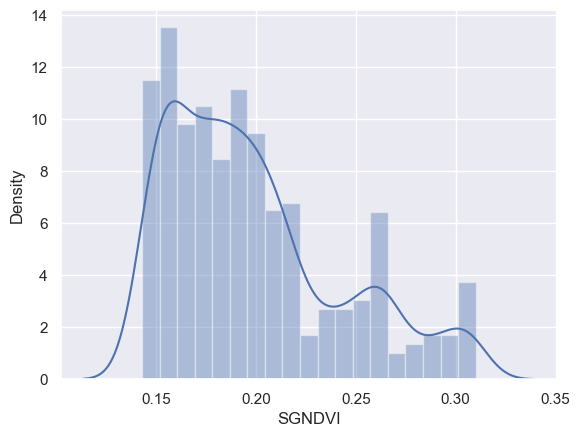

In [29]:
sns.distplot(df_comp['SGNDVI'])
plt.savefig("Mulungushi Station Outliers Data.png")

In [30]:
sns.distplot(df_comp['ScaledS_ET'])
plt.savefig("Serenje Station Outliers Data1.png")

KeyError: 'ScaledS_ET'

To see the outliers clearly we use box plots by calling on our column of interest from the sns package

    boxplot(DATA FRAME [])

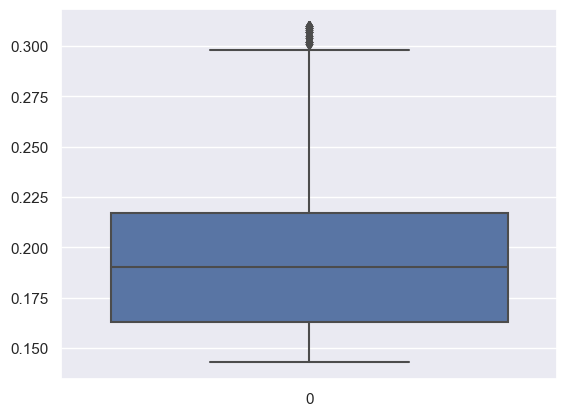

In [31]:
sns.boxplot(df_comp['SGNDVI'])
plt.savefig("Satellite Based Data BoxPlot.png")

### Processing of data

#### 1. Splitting of data

#### For successful machine🤖 learning, we need to split the available data into two sets: 
👉🏾 A training set and a testing set. The goal is to have the option of feeding new information into the model and comparing its predictions to actual values. The closer the forecasts match our value, the better the model performs.

For many ML methods we shuffle the data before splitting it however TS however time series data relies in keeping the chronological order of values within a setk. This unfortunately, makes shuffling impossible.

Since we cannot shuffle, the training and the testing set should be uninterupted sequences of values. 

The training set should include data from the beginning of a set, up to a specific point in time while the testing set - the rest. 
👉🏾 The appropriate size of the training set is debatable, if it is too long, the model will fit the actual data too well and will perform poorly with the new data. 

👉🏾If it is too small, we won't be able to create a model accurate enough. 

🎼 In this study, an 80%:20% is used (which is reasonable). 

##### Use the "iloc" method (coming from the index location) which slices the data
👉🏾 We must know where the first set begins and where the second one begins 
👉🏾 In other words, we must determine the cutoff point point. 

To achieve this, we use the "len" function which returns the length of an object in Python. 
👉🏾 Let's define an integer (int) variable called size which defines how long the training set should be. As stated before, we want to use approximately 80% of the entire data set: the result will be the length of the training set. 

Use the code below:

In [32]:
size = int(len(df_comp)*0.8)
# df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

After determining where the training should end, we should now use the "iloc"

Training set will be named "df". the "df" is short hand to save time as we will refer to it a lot. 
Testing set will be name "df_test".

We refer df up to the size value ( which as defined above is an integer taking 80% of the entire data frame👍🏾)

In [33]:
df = df_comp.iloc[size]

In [34]:
df_test = df_comp.iloc[size]

In [35]:
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [36]:
df.tail()

,SGNDVI
date,
2016-11-29,0.144
2016-11-30,0.144
2016-12-01,0.144
2016-12-02,0.144
2016-12-03,0.144


In [37]:
df_test.head()

,SGNDVI
date,
2016-12-04,0.144
2016-12-05,0.145
2016-12-06,0.145
2016-12-07,0.145
2016-12-08,0.145


## Main approaches for mathematical modeling

### White Noise

#### 🙋🏾‍♂️ What at is it? Why do we need it?
What noise is special type of TS, where the data doesn't follow a pattern. 

💡A recap of TS is that, data in the past, also persists in the future (training:test).
    👉🏾 In this case, since no pattern can be found, the data is unpredictable. 
    👉🏾 In order for a series to be considered as 'white noise', it must satisfy the following three conditions:
        ✔ μ   - the mean must be constant
        ✔ σ^2 - constant standard deviations
        ✔     - no autocorrelation in any period: This means that there is no clear relationship between past and present values. 

The first two ideas are straight forward, on the third, we need to try and iterate a little more. 

ρ = corr( xt, xt-1)

##### White Noise is a sequence of random data, whree every value has a time-period associated with it
👉🏾We can say it behaves sporadically, hence there is no prediction into the future. 

Dictionary 📖
ρ σ μ λ Σ φ Φ γ Γ 

In (financial) modelling, it is important to distinguish between white noise data and regular TS data. We can easily tell the two apart by comparing  their graphs. 

wn = np.random.normal() 

This will create an array of values in a 'Normal' distribution 

    [x1, x2, x3, ..., xn]
    X ~ N(μ, σ^2)

If we want this series to be compared to the actual sequence, we should set its mean and standard deviation to that of the actual sequence data set. 

    X ~ N(μMOD, σ^2MOD)


the location argument of the method loc, takes numbers of the average point of the distribution
    (loc = df.SGNDVI.mean(), scale = df.SGNDVI.std())

Before calling the method, we define how many values we want it to generate. If we want the sequence to serve as a good comparison, it should have 
as many elements (values) as our time series. 

so let's set the size argument as shown below:

  loc = df.SGNDVI.mean(), scale = df.SGNDVI.std(), size = len(df) then run the cell!

In [38]:
wn = np.random.normal(loc = df.SGNDVI.mean(), scale = df.SGNDVI.std(), size = len(df))

#### We now add the White Noise to the dataframe

In [39]:
df['White_Noise'] = wn

C:\Users\FELIX\AppData\Local\Temp\ipykernel_14056\2775205497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['White_Noise'] = wn


💡 Every value of the WN sequence will be assigned a time period since the df uses dates as indices 

☝🏾 The ⚠ message above will be  discussed

Let's how the data frame looks like after adding a new column

In [40]:
df.describe()

,SGNDVI,White_Noise
count,1344.000000,1344.000000
mean,0.205231,0.204139
std,0.045127,0.045274
min,0.143000,0.041261
25%,0.169000,0.174133
50%,0.199000,0.204689
75%,0.234000,0.235255
max,0.310000,0.347376


In [63]:
df.to_csv("NDVIWN.csv", index=True)

##### 🚦 Notice that that the mean of the series (SGNDVI) is similar to that of the White Noise

This is because the White Noise is generated around the mean of SGNDVI. However, since each data set is generated separately, the mean cannot be the same. 

##### Let's now name and plot it. It is important ot name to avoid mistakes when extracting insights

It's important to note that the size method is assigned a number to make the size distinguishable. 

We also call the figure size (figsize) to stretch the graph and be able to observe the values clearly. figsize is an argument of the plot method plt()

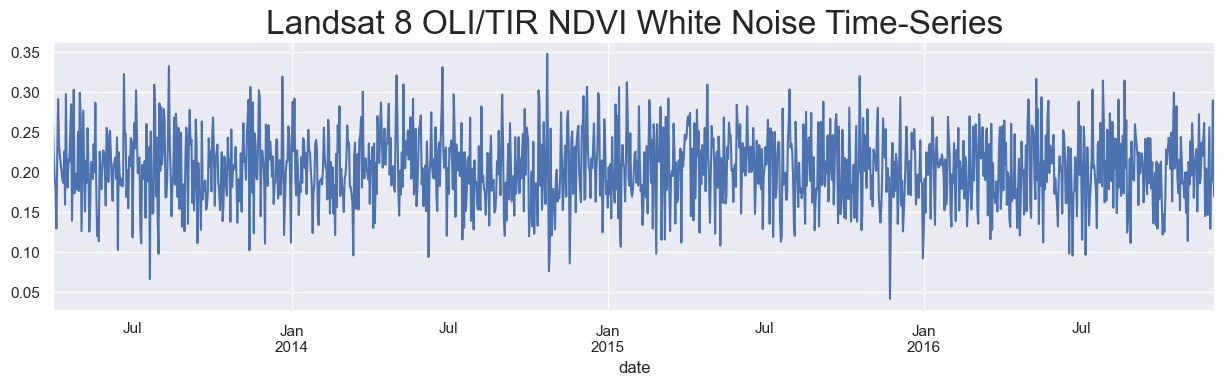

<Figure size 640x480 with 0 Axes>

In [56]:
df.White_Noise.plot(figsize =(15, 3.5))
plt.title("Landsat 8 OLI/TIR NDVI White Noise Time-Series", size = 24)
plt.show()
plt.savefig("Landsat8OLI_TIRNDVIWhiteNoise TimeSeries.png")#, dpi =600)

##### We now plot the SGNDVI data with similar criteria to make the two graphs comparable 
If the graphs are different (i.e the y axis), we can modify the respective graph to match the other one using this code: 
    plt.ylin(a, b) where a is the lower limit and b is the upper limit. In this case, everythin looks in order.

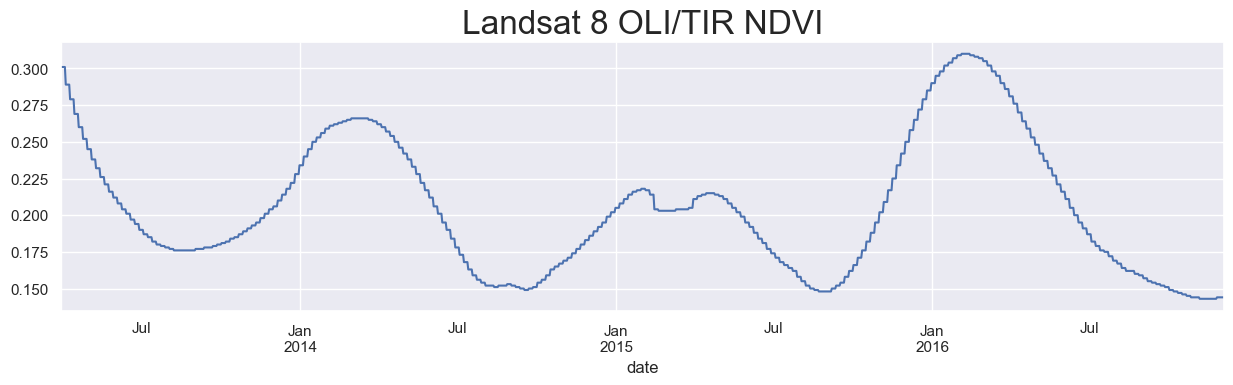

<Figure size 640x480 with 0 Axes>

In [60]:
df.SGNDVI.plot(figsize =(15, 3.5))
plt.title("Landsat 8 OLI/TIR NDVI", size = 24)
plt.show()
plt.savefig("Landsat8OLI-TIRNDVI.pdf")

##### 💡Looking at the two graphs, the WN graph has more jumps towards the data showing the randomness while the actual MPD16A2 data has even spikes which 
indicate a pattern

Let's join the two graphs in a White Noise vs SGNDVI graph, add a legend and download this figure using the two lines of code below: 

plt.legend(loc = [.2, .2]);
plot.savefig("SGNDVI and Noise comparison.png")

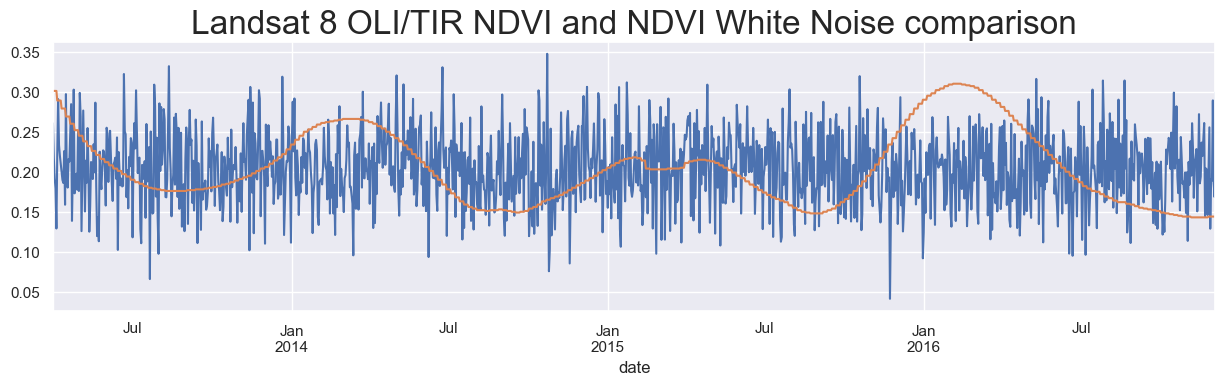

FileNotFoundError: [Errno 2] No such file or directory: 'Landsat 8 OLI/TIR NDVI and NDVI White Noise comparison.png'

<Figure size 640x480 with 0 Axes>

In [46]:
df.White_Noise.plot(figsize =(15, 3.5))
df.SGNDVI.plot(figsize =(15, 3.5))
plt.title("Landsat 8 OLI/TIR NDVI and NDVI White Noise comparison", size = 24)
plt.show()
# plt.legend(loc = [.2, .2]);
plt.savefig("Landsat 8 OLI/TIR NDVI and NDVI White Noise comparison.png")

💡🚦 See the trend in the orange line and the randomness of the blue line